# RECONOCIMIENTO POR FOTO

1/1 [==============================] - 0s 182ms/step
Dipladenia - Confianza: 95.83743810653687 %
Flor de Luna - Confianza: 8.563131359551335e-05 %
Nochebuena - Confianza: 0.7084551267325878 %
Tajonal - Confianza: 7.516690203601684e-06 %
Tulipan - Confianza: 3.45400907099247 %

LA FLOR QUE SE ENCONTRÓ FUE: Dipladenia
La confianza es de: 95.83743810653687 



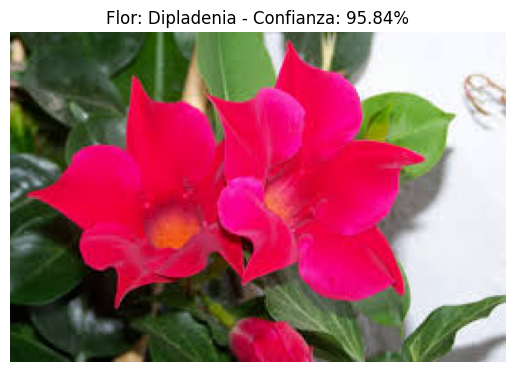

In [48]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Nombres de clases o subcarpetas del dataset
flores = ["Dipladenia", "Flor de Luna", "Nochebuena", "Tajonal", "Tulipan"]

# Cargar el modelo entrenado
flower_model = load_model("trained/flores1.h5")

# Función para predecir la clase de una imagen y mostrar la imagen con la etiqueta predicha
def predecir_mostrar_imagen(image_path):
    # Cargar la imagen y redimensionarla a 26x26 píxeles
    img = Image.open(image_path)
    img_s = img.resize((26, 26))
    new_image = np.array(img_s)
    
    # Asegurarse de que la imagen tenga el formato adecuado para la red neuronal
    new_image = new_image.reshape(1, 26, 26, 3)
    new_image = new_image / 255.0
    
    # Realizar la predicción
    predictions = flower_model.predict(new_image)
    predicted_class = np.argmax(predictions)
    
    # Obtener la probabilidad de la clase predicha
    confidence = np.max(predictions) * 100  # Multiplicar por 100 para obtener el porcentaje

    i = 0
    for flor in flores:  
        print(flor, "- Confianza:", predictions[0][i]*100, "%")
        i= i + 1
    
    # Mostrar el nombre de la flor predicha en la imagen
    predicted_flower = flores[predicted_class]
    
    print("\nLA FLOR QUE SE ENCONTRÓ FUE:", predicted_flower)
    print("La confianza es de:", confidence, "\n")
    
    # Mostrar la imagen junto con la clase predicha y su probabilidad
    plt.imshow(img)
    plt.title(f"Flor: {flores[predicted_class]} - Confianza: {confidence:.2f}%")
    plt.axis('off')  # Deshabilitar los ejes
    plt.show()

# Ruta de la imagen de prueba
new_image_path = "prueba/flor4.jpg"

# Llamar a la función para predecir y mostrar la imagen con la clase predicha
predecir_mostrar_imagen(new_image_path)


# RECONOCIMIENTO POR FOTO EN INTERNET

1/1 [==============================] - 0s 83ms/step
Dipladenia - Confianza: 11.982810497283936 %
Flor de Luna - Confianza: 0.00011164656825712882 %
Nochebuena - Confianza: 26.065874099731445 %
Tajonal - Confianza: 0.005187554779695347 %
Tulipan - Confianza: 61.946022510528564 %

LA FLOR QUE SE ENCONTRÓ FUE: Tulipan
La confianza es de: 61.946022510528564 



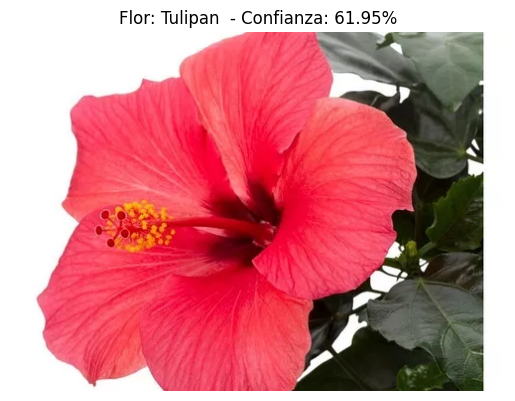

In [13]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

flores = ["Dipladenia", "Flor de Luna", "Nochebuena", "Tajonal", "Tulipan"]  

# Carga tu modelo CNN previamente entrenado
model = load_model('trained/flores1.h5') 

# URL de la imagen
url = "https://http2.mlstatic.com/D_NQ_NP_743004-MLM40408492224_012020-O.webp"

# Descargar la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Preprocesamiento de la imagen
img_s = img.resize((26, 26))
new_image = np.array(img_s)

# Asegura de que la imagen tenga el formato adecuado para la red neuronal
new_image = new_image.reshape(1, 26, 26, 3)
new_image = new_image / 255.0

# Predicción utilizando el modelo
prediction = model.predict(new_image)
predicted_class = np.argmax(prediction, axis=-1)
confidence = np.max(prediction) * 100 

i = 0
for flor in flores:  
    print(flor, "- Confianza:", prediction[0][i]*100, "%")
    i= i + 1

# Mostrar el nombre de la flor predicha en la imagen
predicted_flower = flores[predicted_class[0]]

print("\nLA FLOR QUE SE ENCONTRÓ FUE:", predicted_flower)
print("La confianza es de:", confidence, "\n")

# Mostrar la imagen junto con la clase predicha y su probabilidad
plt.imshow(img)
plt.title(f"Flor: {flores[predicted_class[0]]}  - Confianza: {confidence:.2f}%")
plt.axis('off')  # Deshabilitar los ejes
plt.show()


# RECONOCIMIENTO POR VIDEO

In [57]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np

# Carga tu modelo CNN previamente entrenado
model = load_model("trained/flores1.h5")  

# Abre el video
video = cv2.VideoCapture("D:/Descargas/flores/IMG_0807.MOV")  # Reemplaza con la ruta de tu video

while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    
    # Preprocesamiento de la imagen
    resized_frame = cv2.resize(frame, (26, 26))  # Ajusta al tamaño esperado por tu modelo
    resized_frame = np.expand_dims(resized_frame, axis=0)
    resized_frame = resized_frame / 255.0  # Normalización
    
    # Predicción utilizando el modelo
    prediction = model.predict(resized_frame)
    predicted_class = np.argmax(prediction, axis=-1)

    confidence = np.max(prediction) * 100  # Multiplicar por 100 para obtener el porcentaje
    
    # Mostrar el nombre de la flor predicha en el fotograma
    class_names = ["Dipladenia", "Flor de Luna", "Nochebuena", "Tajonal", "Tulipan"]
    text = "Flor: " + class_names[predicted_class[0]] 
    cv2.putText(frame, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Redimensionar el fotograma para mostrar en una ventana más pequeña
    resized_frame_display = cv2.resize(frame, (540, 960))

    # Muestra el fotograma con la predicción
    cv2.imshow('Video con predicción de flores', resized_frame_display)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 25ms/step


# RECONOCIMIENTO POR CAMARA

In [1]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np

# Carga tu modelo CNN previamente entrenado
model = load_model("trained/flores1.h5") 

# Configuración de la cámara
cap = cv2.VideoCapture(0)  # Usar la cámara por defecto (puede variar dependiendo del sistema)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocesamiento de la imagen
    resized_frame = cv2.resize(frame, (26, 26))  # Ajusta al tamaño esperado por tu modelo
    resized_frame = np.expand_dims(resized_frame, axis=0)
    resized_frame = resized_frame / 255.0  # Normalización
    
    # Predicción utilizando el modelo
    prediction = model.predict(resized_frame)
    predicted_class = np.argmax(prediction, axis=-1)
    
    # Mostrar el nombre de la flor predicha en el fotograma
    class_names = ["Dipladenia", "Flor de Luna", "Nochebuena", "Tajonal", "Tulipan"]
    text = "Flor: " + class_names[predicted_class[0]]
    cv2.putText(frame, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Muestra el fotograma con la predicción
    cv2.imshow('Detección de flores en tiempo real', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()




1/1 [==============================] - 0s 31ms/step


In [2]:
# Prueba con video 
import cv2

# Definición de la lista de nombres de clases (reemplaza esto con tus propias clases)
flores = ["Dipladenia", "Flor de Luna", "Nochebuena", "Tajonal", "Tulipan"]

# Cargar el modelo entrenado
flower_model = load_model("trained/flores1.h5")

# Ruta al archivo de video (reemplaza esto con la ruta de tu video)
video_path = "D:/Descargas/flores/IMG_0818.MOV"

# Inicializar el objeto de captura de video
cap = cv2.VideoCapture(video_path)

while True:
    # Lee un fotograma del video
    ret, frame = cap.read()

    # Verifica si se ha llegado al final del video
    if not ret:
        break

    # Realiza las mismas operaciones que para una imagen individual
    # Asegúrate de que el tamaño del fotograma coincida con el tamaño de entrada del modelo
    frame = cv2.resize(frame, (26, 26))

    # Asegúrate de que el fotograma tiene las mismas dimensiones que las imágenes con las que entrenaste tu modelo
    frame = frame.reshape(1, 26, 26, 3)

    # Normaliza el fotograma si es necesario
    frame = frame / 255.0  # Normalizar entre 0 y 1, si tus imágenes originales también se normalizaron

    # Realiza la predicción
    predictions = flower_model.predict(frame)

    # Obtén la clase predicha (la clase con la probabilidad más alta)
    predicted_class = np.argmax(predictions)

    # Imprime la clase predicha
    print("El fotograma se clasifica como:", flores[predicted_class])

    # Muestra el fotograma con la clase predicha
    cv2.imshow("Video", frame)

    # Espera 1 milisegundo y verifica si se presiona la tecla 'q' para salir del bucle
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libera los recursos
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 145ms/step
El fotograma se clasifica como: Dipladenia


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:124: error: (-215:Assertion failed) bmi && width >= 0 && height >= 0 && (bpp == 8 || bpp == 24 || bpp == 32) in function 'FillBitmapInfo'
